<a href="https://colab.research.google.com/github/rfdyning6/rfdyning6.github.io/blob/main/dataproduk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install pip --upgrade
!pip install category_encoders

     |████████████████████████████████| 1.7 MB 7.8 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     |████████████████████████████████| 82 kB 404 kB/s             


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder
from matplotlib.ticker import StrMethodFormatter

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option("display.max_columns", 88)
pd.set_option("display.max_rows", 88)

In [3]:
#New Update Data Set from BRI
ds_df=pd.read_csv('https://decko048.github.io/dataset/data_sup.csv') 
dp_df=pd.read_csv('https://decko048.github.io/dataset/data_produk.csv')
su_df=pd.read_csv('https://decko048.github.io/dataset/std_unwind.csv')
sr_df=pd.read_csv('https://decko048.github.io/dataset/std_rewind.csv')

print('Data SUP Shape :', ds_df.shape)
print('Data Produk Shape :', dp_df.shape)
print('Standard Unwind Shape :', su_df.shape)
print('Standard Rewind Shape :', sr_df.shape)
dp_df.head(15)

Data SUP Shape : (865, 3)
Data Produk Shape : (808, 6)
Standard Unwind Shape : (5, 6)
Standard Rewind Shape : (5, 6)


,Artikel,JmlhWrna,JnsCtk,JnsBhn,Tebal (mic),Lebar (mm)
0,DJARUM SUPER 12 EURO 2021 ...,8,REVERSE,OPP,20.00,970.00
1,67930308 ROLL ROYCO SALTED EGG 22G MSPK NEW ...,7,SURFACE,PET,12.00,1150.00
2,SWEETENED CONDENSED MILK TOPSAHO 30 GR AFRIKA ...,7,REVERSE,PET-G,12.00,1170.00
3,ROLL SWTR DIABTX 1020MM 87146-1304-602 ...,6,REVERSE,PET,12.00,1045.00
4,14011708/23010968-STP SKL W&B 750ML HLL ...,7,REVERSE,PET,12.00,1000.00
5,KTG SP 280 ALOEVERA PEACH NEW ...,7,REVERSE,NY-01,15.00,750.00
6,CAFFINO MOCCA 20GRX10 OUTERPOUCH E-KARIP NEW ...,7,SURFACE,PET-G,12.00,1120.00
7,KUSUKA 60GR RASA BARBEQUE NEW ...,7,REVERSE,PET-G,12.00,1050.00
8,CAFFINO CHONUT 20GRX10 OUTERPOUCH E-KARIP NEW ...,8,SURFACE,PET-G,12.00,1120.00
9,MARIMAS MANGGA 7GR MLT MAY'23 ...,8,REVERSE,PET,12.00,935.00


In [4]:
# Change columns name it's contain space
ds_df.rename(columns={'OPP-G':'OPP','CERUTI.2':'CERUTI_2',
                      'CERUTI.3':'CERUTI_3','CERUTI.5':'CERUTI_5'}, inplace=True)

In [5]:
dp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Artikel      808 non-null    object 
 1   JmlhWrna     808 non-null    int64  
 2   JnsCtk       808 non-null    object 
 3   JnsBhn       808 non-null    object 
 4   Tebal (mic)  808 non-null    float64
 5   Lebar (mm)   808 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 38.0+ KB


In [6]:
dp_df = dp_df.fillna(0)
dp_df.head(15)

,Artikel,JmlhWrna,JnsCtk,JnsBhn,Tebal (mic),Lebar (mm)
0,DJARUM SUPER 12 EURO 2021 ...,8,REVERSE,OPP,20.00,970.00
1,67930308 ROLL ROYCO SALTED EGG 22G MSPK NEW ...,7,SURFACE,PET,12.00,1150.00
2,SWEETENED CONDENSED MILK TOPSAHO 30 GR AFRIKA ...,7,REVERSE,PET-G,12.00,1170.00
3,ROLL SWTR DIABTX 1020MM 87146-1304-602 ...,6,REVERSE,PET,12.00,1045.00
4,14011708/23010968-STP SKL W&B 750ML HLL ...,7,REVERSE,PET,12.00,1000.00
5,KTG SP 280 ALOEVERA PEACH NEW ...,7,REVERSE,NY-01,15.00,750.00
6,CAFFINO MOCCA 20GRX10 OUTERPOUCH E-KARIP NEW ...,7,SURFACE,PET-G,12.00,1120.00
7,KUSUKA 60GR RASA BARBEQUE NEW ...,7,REVERSE,PET-G,12.00,1050.00
8,CAFFINO CHONUT 20GRX10 OUTERPOUCH E-KARIP NEW ...,8,SURFACE,PET-G,12.00,1120.00
9,MARIMAS MANGGA 7GR MLT MAY'23 ...,8,REVERSE,PET,12.00,935.00


In [7]:
cleanup_nums ={"JnsCtk":{"REVERSE":1,"SURFACE":2}}

In [8]:
fn_df = dp_df.replace(cleanup_nums)
fn_df = fn_df.fillna(0)
fn_df.head(15)

,Artikel,JmlhWrna,JnsCtk,JnsBhn,Tebal (mic),Lebar (mm)
0,DJARUM SUPER 12 EURO 2021 ...,8,1,OPP,20.00,970.00
1,67930308 ROLL ROYCO SALTED EGG 22G MSPK NEW ...,7,2,PET,12.00,1150.00
2,SWEETENED CONDENSED MILK TOPSAHO 30 GR AFRIKA ...,7,1,PET-G,12.00,1170.00
3,ROLL SWTR DIABTX 1020MM 87146-1304-602 ...,6,1,PET,12.00,1045.00
4,14011708/23010968-STP SKL W&B 750ML HLL ...,7,1,PET,12.00,1000.00
5,KTG SP 280 ALOEVERA PEACH NEW ...,7,1,NY-01,15.00,750.00
6,CAFFINO MOCCA 20GRX10 OUTERPOUCH E-KARIP NEW ...,7,2,PET-G,12.00,1120.00
7,KUSUKA 60GR RASA BARBEQUE NEW ...,7,1,PET-G,12.00,1050.00
8,CAFFINO CHONUT 20GRX10 OUTERPOUCH E-KARIP NEW ...,8,2,PET-G,12.00,1120.00
9,MARIMAS MANGGA 7GR MLT MAY'23 ...,8,1,PET,12.00,935.00


In [9]:
fn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Artikel      808 non-null    object 
 1   JmlhWrna     808 non-null    int64  
 2   JnsCtk       808 non-null    int64  
 3   JnsBhn       808 non-null    object 
 4   Tebal (mic)  808 non-null    float64
 5   Lebar (mm)   808 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 38.0+ KB


In [10]:
ob_df=dp_df.select_dtypes(include=['object']).copy()
ob_df = ob_df.fillna(0)
ob_df.head(15)

,Artikel,JnsCtk,JnsBhn
0,DJARUM SUPER 12 EURO 2021 ...,REVERSE,OPP
1,67930308 ROLL ROYCO SALTED EGG 22G MSPK NEW ...,SURFACE,PET
2,SWEETENED CONDENSED MILK TOPSAHO 30 GR AFRIKA ...,REVERSE,PET-G
3,ROLL SWTR DIABTX 1020MM 87146-1304-602 ...,REVERSE,PET
4,14011708/23010968-STP SKL W&B 750ML HLL ...,REVERSE,PET
5,KTG SP 280 ALOEVERA PEACH NEW ...,REVERSE,NY-01
6,CAFFINO MOCCA 20GRX10 OUTERPOUCH E-KARIP NEW ...,SURFACE,PET-G
7,KUSUKA 60GR RASA BARBEQUE NEW ...,REVERSE,PET-G
8,CAFFINO CHONUT 20GRX10 OUTERPOUCH E-KARIP NEW ...,SURFACE,PET-G
9,MARIMAS MANGGA 7GR MLT MAY'23 ...,REVERSE,PET


In [11]:
ob_df=ob_df.replace(cleanup_nums)
ob_df.head()

,Artikel,JnsCtk,JnsBhn
0,DJARUM SUPER 12 EURO 2021 ...,1,OPP
1,67930308 ROLL ROYCO SALTED EGG 22G MSPK NEW ...,2,PET
2,SWEETENED CONDENSED MILK TOPSAHO 30 GR AFRIKA ...,1,PET-G
3,ROLL SWTR DIABTX 1020MM 87146-1304-602 ...,1,PET
4,14011708/23010968-STP SKL W&B 750ML HLL ...,1,PET


In [12]:
from io import StringIO
col = ['Artikel','JmlhWrna','JnsCtk',
       'JnsBhn','Tebal (mic)','Lebar (mm)']
cat_df = fn_df[col]
cat_df = cat_df[pd.notnull(fn_df['JnsCtk'])]
cat_df.columns = ['Artikel','JmlhWrna','JnsCtk',
                  'JnsBhn','Tebal (mic)','Lebar (mm)']

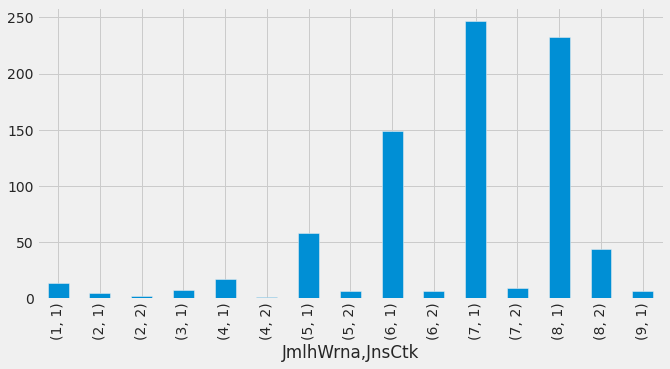

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
cat_df.groupby(['JmlhWrna','JnsCtk']).JnsBhn.count().plot.bar(ylim=0)
plt.show()

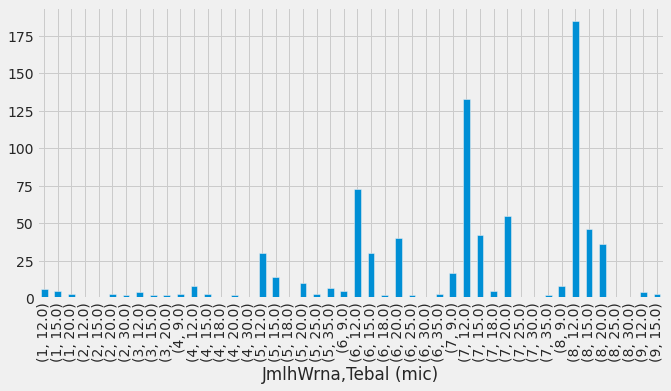

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
cat_df.groupby(['JmlhWrna','Tebal (mic)']).JnsBhn.count().plot.bar(ylim=0)
plt.show()

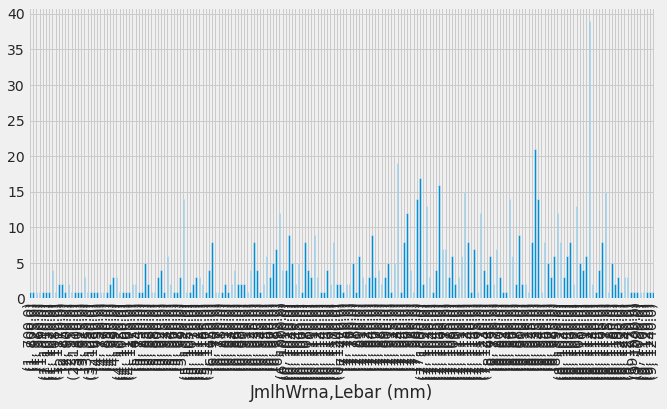

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
cat_df.groupby(['JmlhWrna','Lebar (mm)']).JnsBhn.count().plot.bar(ylim=0)
plt.show()

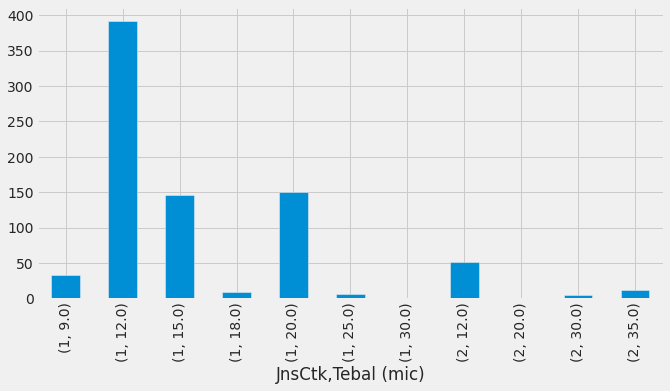

In [16]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
cat_df.groupby(['JnsCtk','Tebal (mic)']).JnsBhn.count().plot.bar(ylim=0)
plt.show()

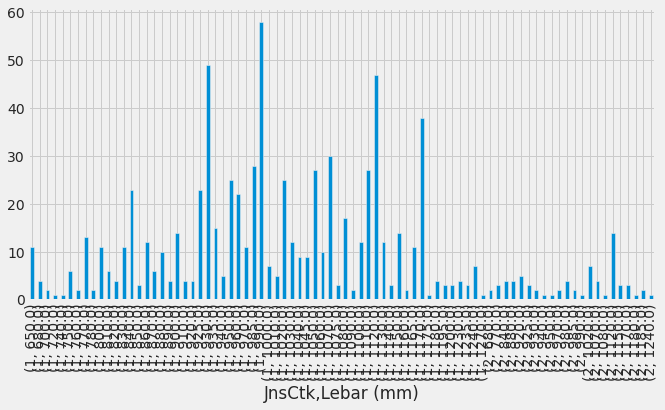

In [17]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
cat_df.groupby(['JnsCtk','Lebar (mm)']).JnsBhn.count().plot.bar(ylim=0)
plt.show()

In [39]:
fn_df.describe().T

,count,mean,std,min,25%,50%,75%,max
JmlhWrna,808.00,6.75,1.43,1.00,6.00,7.00,8.00,9.00
JnsCtk,808.00,1.09,0.28,1.00,1.00,1.00,1.00,2.00
Tebal (mic),808.00,14.57,4.42,9.00,12.00,12.00,15.00,35.00
Lebar (mm),808.00,997.83,123.91,650.00,930.00,990.00,1110.00,1270.00


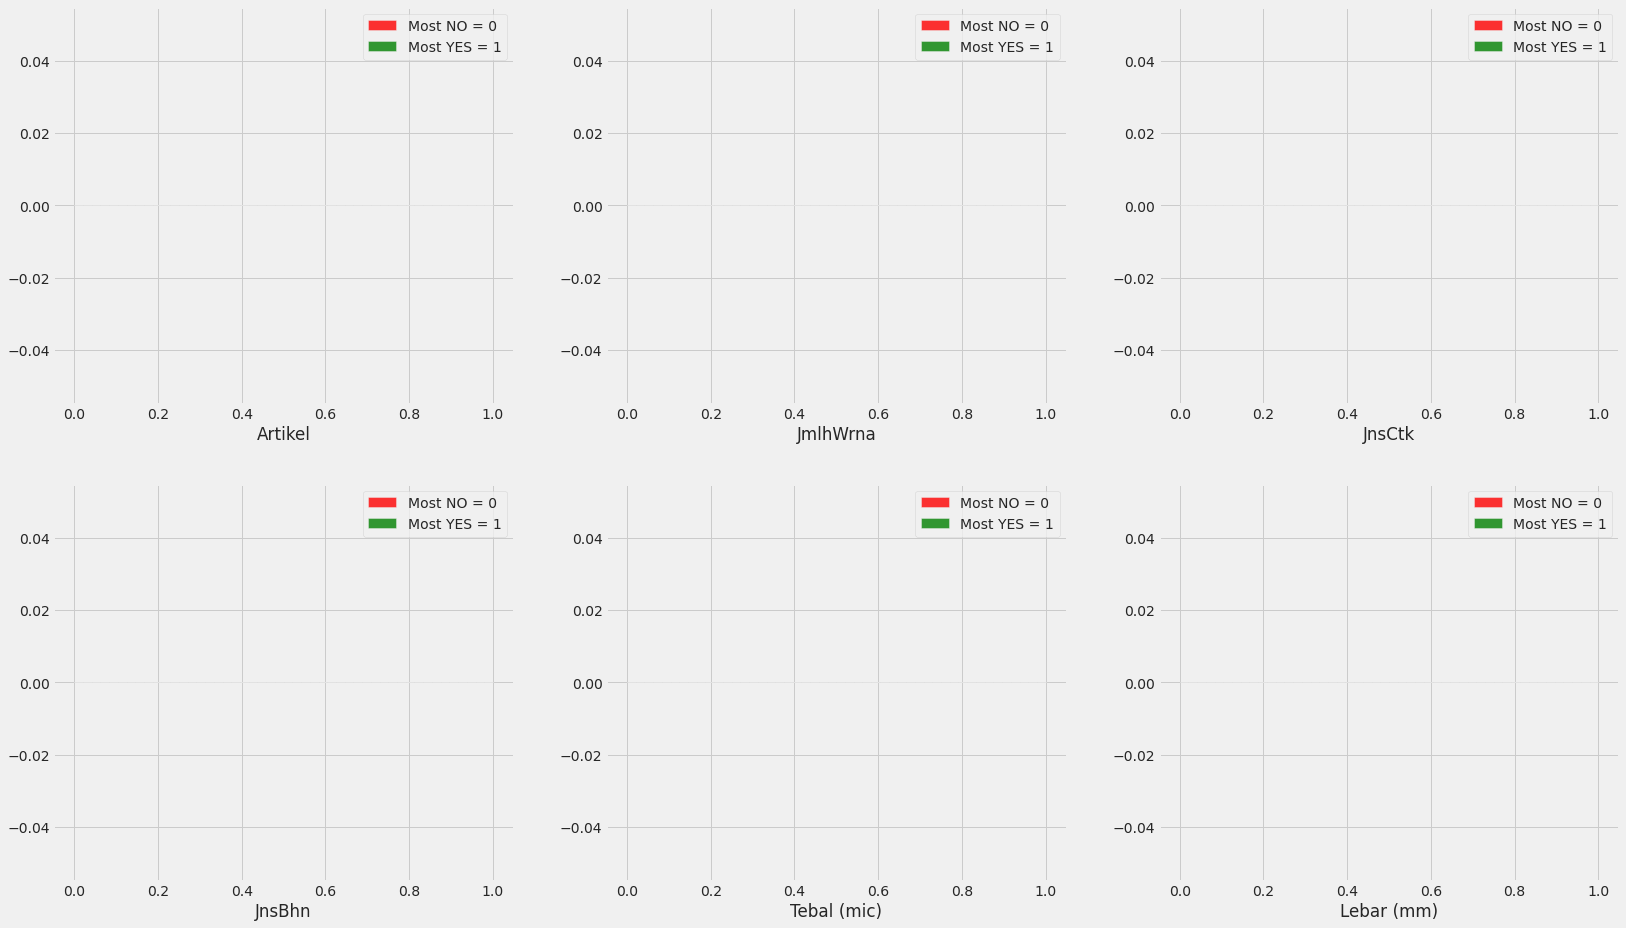

In [36]:
plt.figure(figsize=(25, 15))

for i, column in enumerate(cat_df, 1):
    plt.subplot(2, 3, i)
    fn_df[fn_df["JnsBhn"] == 0][column].hist(bins=48, color='r', label='Most NO = 0', alpha=0.8)
    fn_df[fn_df["JnsBhn"] == 1][column].hist(bins=48, color='g', label='Most YES = 1', alpha=0.8)
    plt.legend()
    plt.xlabel(column)

In [20]:
fn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Artikel      808 non-null    object 
 1   JmlhWrna     808 non-null    int64  
 2   JnsCtk       808 non-null    int64  
 3   JnsBhn       808 non-null    object 
 4   Tebal (mic)  808 non-null    float64
 5   Lebar (mm)   808 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 38.0+ KB


In [21]:
# Machine Learning Algorithms : Test Model/Total Rows data set  6000/11152 = 0.537971846140052
#fn_df = fn_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

dummy_col = [column for column in fn_df.drop('JnsBhn', axis=1).columns if fn_df[column].nunique()]

winteam = pd.get_dummies(fn_df, columns=dummy_col, drop_first=False, dtype='uint8')
winteam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Columns: 890 entries, JnsBhn to Lebar (mm)_1270.0
dtypes: object(1), uint8(889)
memory usage: 707.9+ KB


In [22]:
print(winteam.shape)

# Remove duplicate Features
winteam = winteam.T.drop_duplicates()
winteam = winteam.T

# Remove Duplicate Rows
winteam.drop_duplicates(inplace=True)

print(winteam.shape)

(808, 890)
(808, 886)


In [23]:
# Korelasi terkuat antar variabel dimuali dari 10 % untuk mencapai "BEST PERFORMANCE"

feature_correlation = winteam.drop('JnsBhn', axis=1).corrwith(winteam.JnsBhn).sort_values()
model_col = feature_correlation[np.abs(feature_correlation) > 0.009].index
len(model_col)

0

In [24]:
# Splitting data to training and testing
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

X = winteam.drop('JnsBhn', axis=1)
y = winteam.JnsBhn

# Data which use to "Training"  80 % and "Testing "  20 % (0.214) from cat_df dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.537971846140052, random_state=42)

In [25]:
# Deep Learning Metode ARTIFICIAL NEURAL NETWORKS

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X = scaler.transform(X)

In [26]:
# index = feature, Best Performance = importance
def feature_best_performance(tr_df, model):

    fi = pd.DataFrame()
    fi["index"] = winteam.columns
    fi["JnsBhn"] = model.feature_importances_
    return fi.sort_values(by="JnsBhn", ascending=False)

In [27]:
# Create Prediction Score, value of corelation is 39

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict, cross_val_score 
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.metrics import confusion_matrix 

def cetak_ann(label, prediction, train=True):
    if train:
        print("Train Result :\n====================winteam===========================")
        print(f"\t\t\tAccuracy Score      : {accuracy_score(label, prediction) *100:.2f}%")
        print("Train Matrix :\n_____________________________________________________________________")
        print(f"Confusion Matrix : \n {confusion_matrix(y_train,prediction)}\n")
        
    elif train==False:
        print("Test Result:\n====================winteam=============================")        
        print(f"\t\t\tAccuracy Score      : {accuracy_score(label, prediction) *100:.2f}%")
        print("Test Matrix :\n________________________________________________________________________")
        print(f"Confusion Matrix : \n {confusion_matrix(label, prediction)}\n")

In [43]:
## Deep Learning model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# define the keras model
model = Sequential()

model.add(Dense(X_train.shape[1],  activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
ann = model.fit(X_datasup, y_datasup, validation_data=(X_data_produk, y_data_produk), epochs=40, batch_size=10)

NameError: ignored

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

UnimplementedError: ignored

In [ ]:
model.summary()

ValueError: ignored

NameError: ignored

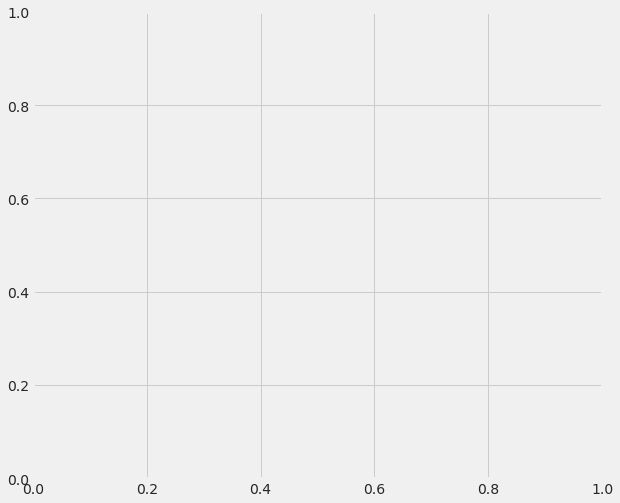

In [ ]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.plot(ann.history['loss'], label='Loss')
plt.plot(ann.history['val_loss'], label='Value Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(ann.history['accuracy'], label='Accuracy')
plt.plot(ann.history['val_accuracy'], label='Value Accuracy')
plt.legend()

In [ ]:
ann_train_predict = model.predict(X_train)
ann_test_predict = model.predict(X_test)

cetak_ann(y_train, ann_train_predict.round(), train=True)
cetak_ann(y_test, ann_test_predict.round(), train=False)

Train Result :
====================winteam===========================
			Accuracy Score      : 0.00%
Train Matrix :
_____________________________________________________________________


ValueError: ignored

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

ann_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test)[:,0])

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, label='Artificial Neural Network (area = %0.5f)' % ann_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ANN_ROC')
plt.show()

In [ ]:
roc_auc_score(y_test, model.predict(X_test)) # Target upper 60 %

In [ ]:
print(ann_test_predict[:,0])

In [ ]:
ann_test_predict.shape

In [ ]:
#Saved the prediction result to "submission.csv"
#kaggle competitions submit -c bri-data-hackathon-pa -f submission.csv -m "Win Team MIT 20"

subm_df = pd.read_csv('https://decko048.github.io/dataset/sample_submission.csv')
subm_df['Best Performance'] = ann_test_predict
subm_df.to_csv('submission.csv', index=False)